In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np 
import seaborn as sns

## Remove the default index 

In [2]:
data = pd.read_csv('./world_population.csv')
stData = data.sort_values(by="Rank", ascending=True)
Data = stData.set_index('Rank', drop=True) 
Data.head()

,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Rank,,,,,,,,,,,,,,,,
1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96


## Counting nullVaues for each Col

In [3]:
countingNull = Data.isnull().sum()
countingNull

CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

## Identity DataType

In [4]:
Data.dtypes

CCA3                            object
Country/Territory               object
Capital                         object
Continent                       object
2022 Population                  int64
2020 Population                  int64
2015 Population                  int64
2010 Population                  int64
2000 Population                  int64
1990 Population                  int64
1980 Population                  int64
1970 Population                  int64
Area (km²)                       int64
Density (per km²)              float64
Growth Rate                    float64
World Population Percentage    float64
dtype: object

## Converting float into int

In [5]:
Data[['Density (per km²)', 'Growth Rate', 'World Population Percentage']] = Data[['Density (per km²)', 'Growth Rate', 'World Population Percentage']].astype(int)
Data.dtypes

CCA3                           object
Country/Territory              object
Capital                        object
Continent                      object
2022 Population                 int64
2020 Population                 int64
2015 Population                 int64
2010 Population                 int64
2000 Population                 int64
1990 Population                 int64
1980 Population                 int64
1970 Population                 int64
Area (km²)                      int64
Density (per km²)               int32
Growth Rate                     int32
World Population Percentage     int32
dtype: object

## Distribution of continent in .csv file 

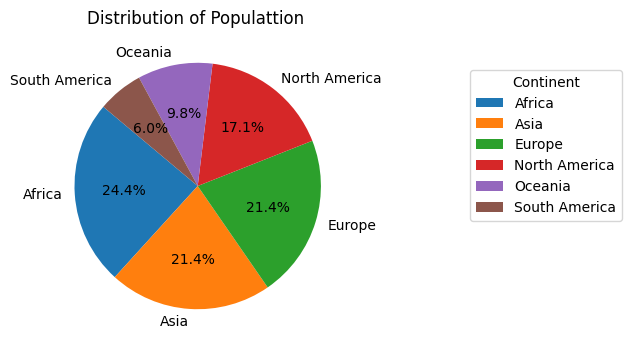

In [6]:
distByContinent = Data['Continent'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(distByContinent, labels=distByContinent.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Populattion ')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, -0.1, 0.7, 1), title='Continent')
plt.show()
# distByContinent


# Total population from 1970 - 2022 

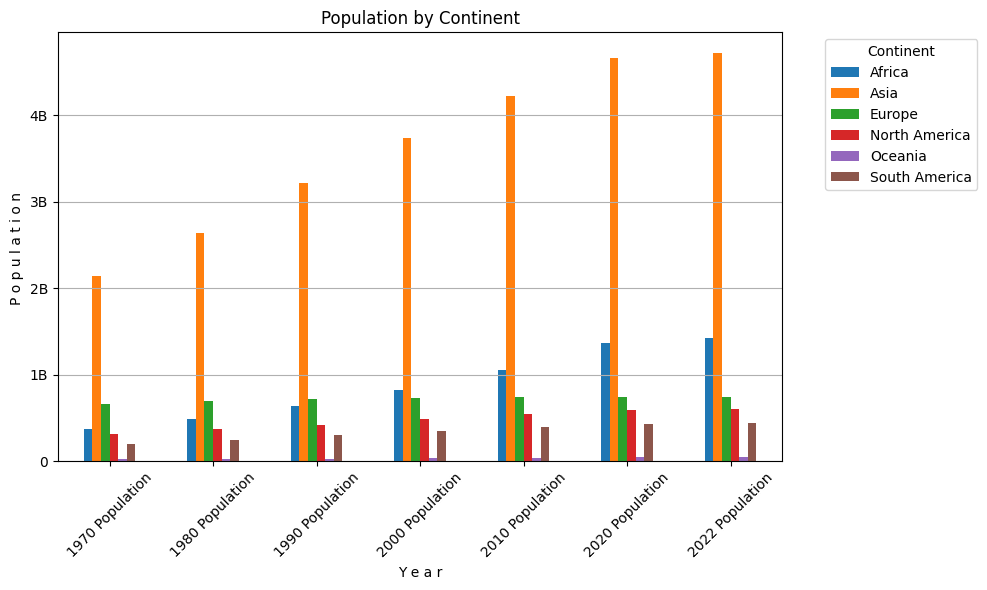

In [7]:
Cont = Data.groupby('Continent')[['1970 Population', '1980 Population', '1990 Population', '2000 Population', '2010 Population', '2020 Population', '2022 Population']].sum()
def formatPopulation(value, _):
    if value >= 1e9:
        return f'{value / 1e9:.0f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:.0f}'
Transposed = Cont.T

# Plotting the bar chart
ax = Transposed.plot(kind='bar', figsize=(10, 6))

# Formatting the y-axis labels using the formatPopulation function
ax.yaxis.set_major_formatter(FuncFormatter(formatPopulation))

plt.xlabel('Y e a r')
plt.ylabel('P o p u l a t i o n ')
plt.title('Population by Continent')
plt.xticks(rotation=45)
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Function to plot 

In [8]:
def plot_population_by_continent(data, continent):
    # Filter data for the specified continent
    continent_df = data[data['Continent'] == continent]
    
    # Extract population data
    years = ['1970 Population', '1980 Population', '1990 Population', '2000 Population', '2010 Population', '2020 Population', '2022 Population']
    population = [continent_df[year].sum() for year in years]

    def formatPopulation(value, _):
        if value >= 1e9:
            return f'{value / 1e9:.0f}B'
        elif value >= 1e6:
            return f'{value / 1e6:.0f}M'
        elif value >= 1e3:
            return f'{value / 1e3:.0f}K'
        else:
            return f'{value:.0f}'

    # Plot the bar chart
    plt.bar(years, population, color='skyblue')
    plt.xlabel('Y e a r')
    plt.ylabel('P o p ul a t i o n')
    plt.title(f'Population of {continent} (2022 - 1970)')
    plt.xticks(rotation=45)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(formatPopulation))
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Population from each CONTINENT
## (2022 - 1970)

## Africa

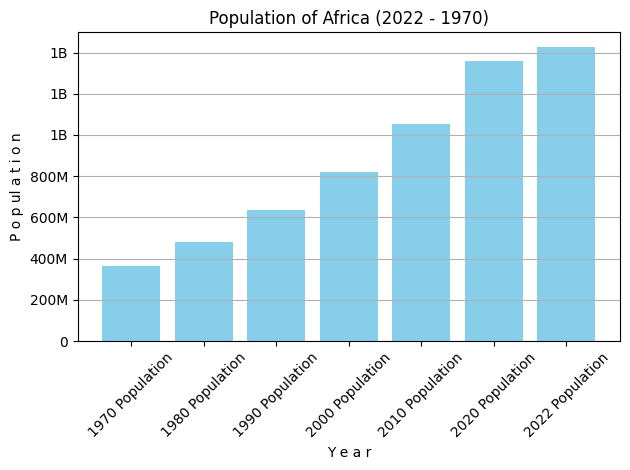

In [9]:
plot_population_by_continent(Data, 'Africa')

## Asia 

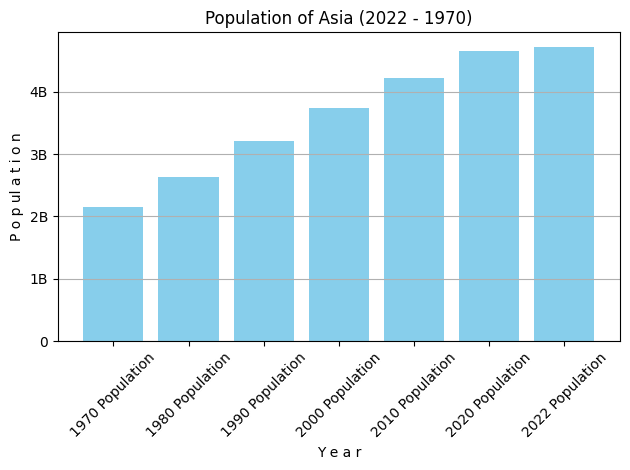

In [10]:
plot_population_by_continent(Data, 'Asia')

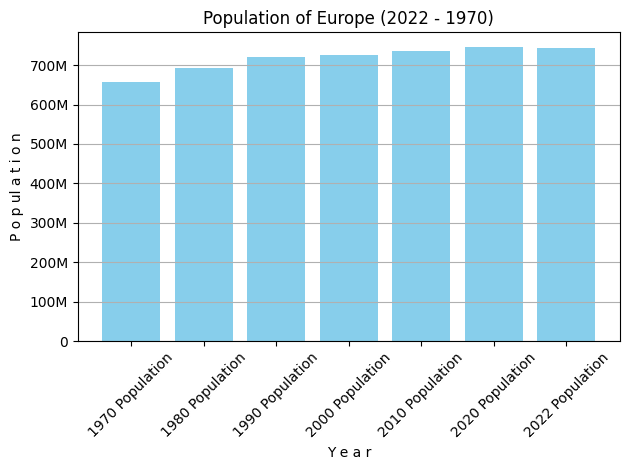

In [11]:
plot_population_by_continent(Data, 'Europe')

## Nort America

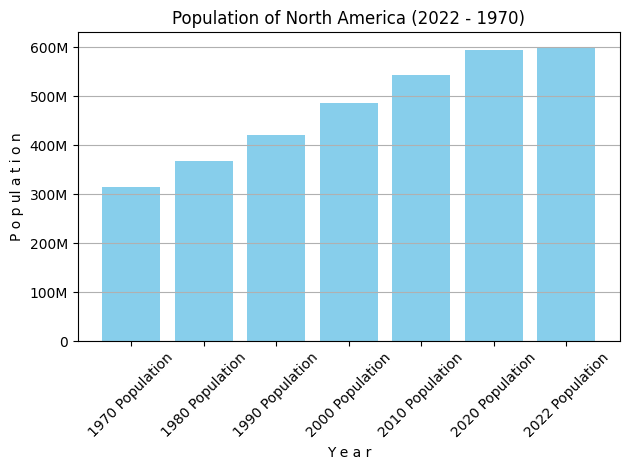

In [12]:
plot_population_by_continent(Data, 'North America')

## Oceania

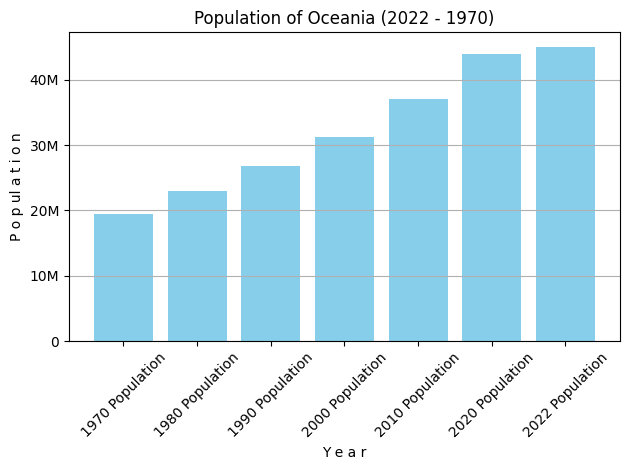

In [13]:
plot_population_by_continent(Data, 'Oceania')

## South America

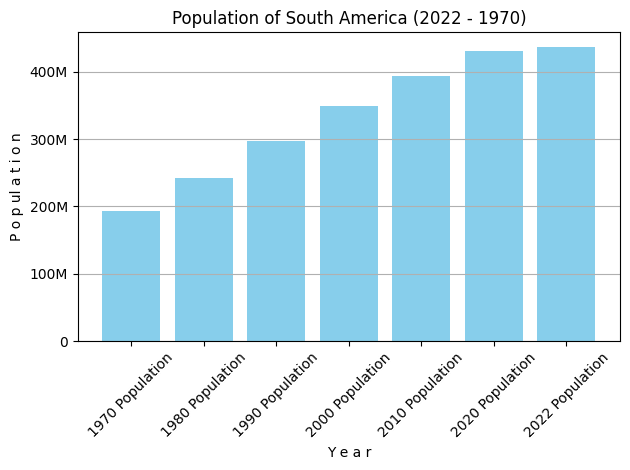

In [14]:
plot_population_by_continent(Data, 'South America')

# Population from each Country
## (2022 - 1970)



In [15]:
def plot_population_by_Country(data, country):
    # Filter data for the specified country
    continent_df = data[data['Country/Territory'] == country]
    
    # Extract population data
    years = ['1970 Population', '1980 Population', '1990 Population', '2000 Population', '2010 Population', '2020 Population', '2022 Population']
    population = [continent_df[year].sum() for year in years]

    def formatPopulation(value, _):
        if value >= 1e9:
            return f'{value / 1e9:.0f}B'
        elif value >= 1e6:
            return f'{value / 1e6:.0f}M'
        elif value >= 1e3:
            return f'{value / 1e3:.0f}K'
        else:
            return f'{value:.0f}'

    # Plot the bar chart
    plt.bar(years, population, color='skyblue')
    plt.xlabel('Y e a r')
    plt.ylabel('P o p ul a t i o n')
    plt.title(f'Population of {country} (2022 - 1970)')
    plt.xticks(rotation=45)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(formatPopulation))
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

## Europe

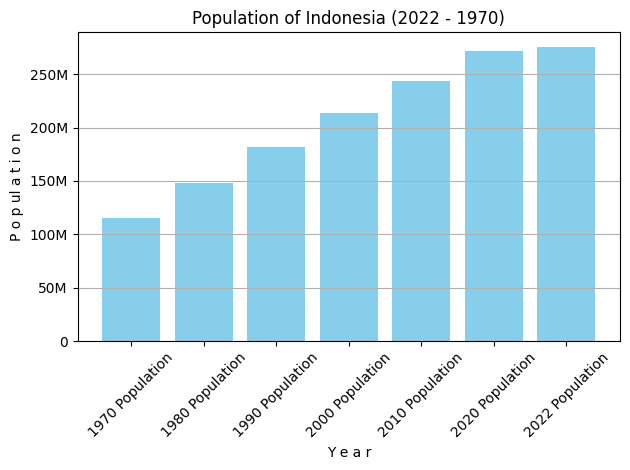

In [16]:
plot_population_by_Country(Data, 'Indonesia') # here u can change Country name to see their population

# Growth Rate of population from each Continent

C:\Users\acer\AppData\Local\Temp\ipykernel_3712\2570399060.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=growth_rate_transposed_sorted, ci=None)


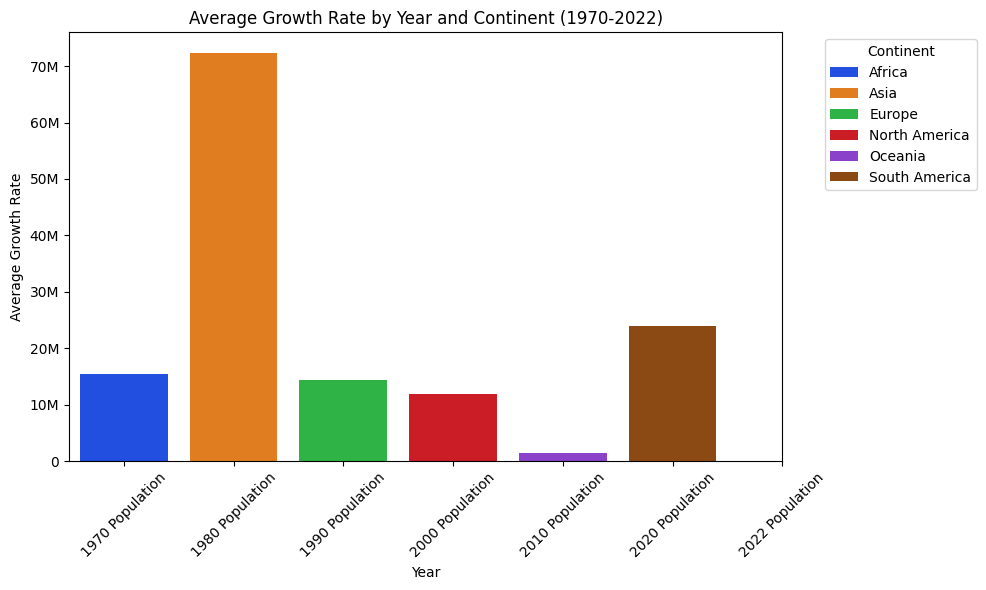

In [17]:
# Define a function to format growth rates
def format_growth_rate(value, _):
    if value >= 1e9:
        return f'{value / 1e9:.0f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:.0f}'

# Transpose the data
growth_rate_transposed = Data.groupby('Continent')[['1970 Population', '1980 Population', '1990 Population', '2000 Population', '2010 Population', '2020 Population', '2022 Population']].mean().T

# Sort the data in ascending order
growth_rate_transposed_sorted = growth_rate_transposed.apply(lambda x: x.sort_values())

# Plotting the growth rates using Seaborn (bar chart)
plt.figure(figsize=(10, 6))
sns.set_palette("bright")  # Set color palette for seaborn
sns.barplot(data=growth_rate_transposed_sorted, ci=None)

plt.xlabel('Year')
plt.ylabel('Average Growth Rate')
plt.title('Average Growth Rate by Year and Continent (1970-2022)')

# Set x-axis labels to years
plt.xticks(range(len(growth_rate_transposed_sorted.index)), growth_rate_transposed_sorted.index, rotation=45)

# Set legend labels to continents
plt.legend(title='Continent', labels=growth_rate_transposed_sorted.columns, bbox_to_anchor=(1.05, 1), loc='upper left')

# Formatting y-axis labels using the format_growth_rate function
plt.gca().yaxis.set_major_formatter(format_growth_rate)

plt.tight_layout()
plt.show()


C:\Users\acer\AppData\Local\Temp\ipykernel_3712\3684538707.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_growth_rate_sorted, x='Continent', y='Growth Rate', palette='bright')


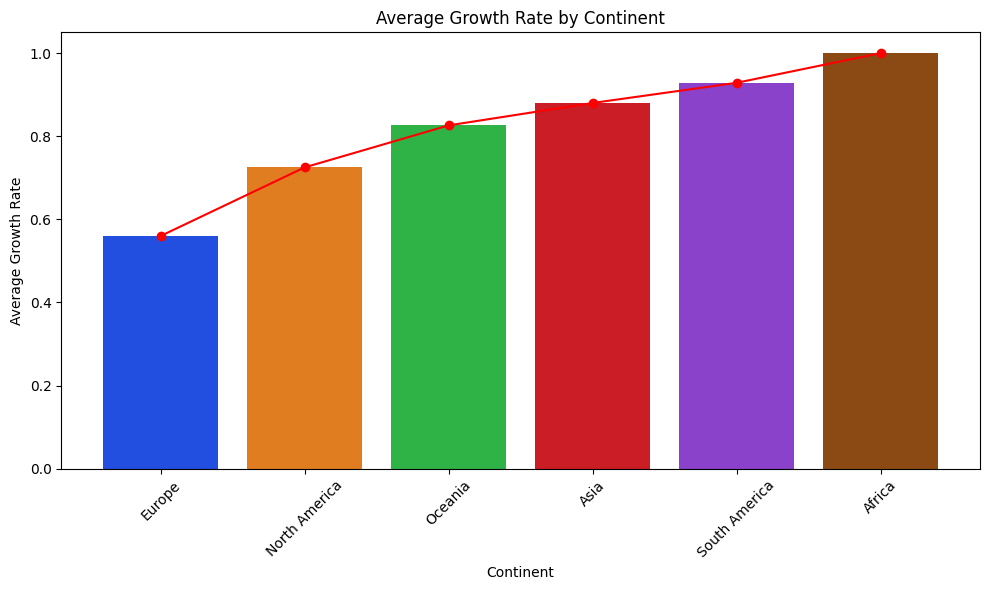

In [18]:
# Calculate average growth rate for each continent
avg_growth_rate = Data.groupby('Continent')['Growth Rate'].mean().reset_index()
avg_growth_rate_sorted = avg_growth_rate.sort_values(by='Growth Rate')

# Plotting the growth rates using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_growth_rate_sorted, x='Continent', y='Growth Rate', palette='bright')
plt.xlabel('Continent')
plt.ylabel('Average Growth Rate')
plt.title('Average Growth Rate by Continent')
plt.xticks(rotation=45)

# Adding a line hovering over the continents
plt.plot(avg_growth_rate_sorted['Continent'], avg_growth_rate_sorted['Growth Rate'], marker='o', color='red')

plt.tight_layout()
plt.show()


# Number of Countries per Continent

In [19]:
def numberOfCountries(continent):
    countries = Data[Data['Continent'] == continent]['Country/Territory'].unique()
    return countries

country_names = numberOfCountries("Africa")
print(f' {country_names}, \nTotal Countries is  {len(country_names)}')


 ['Nigeria' 'Ethiopia' 'Egypt' 'DR Congo' 'Tanzania' 'South Africa' 'Kenya'
 'Uganda' 'Sudan' 'Algeria' 'Morocco' 'Angola' 'Ghana' 'Mozambique'
 'Madagascar' 'Ivory Coast' 'Cameroon' 'Niger' 'Burkina Faso' 'Mali'
 'Malawi' 'Zambia' 'Chad' 'Somalia' 'Senegal' 'Zimbabwe' 'Guinea' 'Rwanda'
 'Benin' 'Burundi' 'Tunisia' 'South Sudan' 'Togo' 'Sierra Leone' 'Libya'
 'Republic of the Congo' 'Central African Republic' 'Liberia' 'Mauritania'
 'Eritrea' 'Gambia' 'Botswana' 'Namibia' 'Gabon' 'Lesotho' 'Guinea-Bissau'
 'Equatorial Guinea' 'Mauritius' 'Eswatini' 'Djibouti' 'Reunion' 'Comoros'
 'Cape Verde' 'Western Sahara' 'Mayotte' 'Sao Tome and Principe'
 'Seychelles'], 
Total Countries is  57
